In [95]:
# ライブラリをインポート

# データ操作と数値計算のため
import pandas as pd
import numpy as np

# データ可視化のため
import matplotlib.pyplot as plt
import seaborn as sns

# 統計モデリングと計量経済分析のため
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.iolib.summary2 import summary_col

# for ignore warning
import warnings
warnings.filterwarnings('ignore')

In [96]:
url = "https://www.fbc.keio.ac.jp/~tyabu/keiryo/spread_data.csv"
df = pd.read_csv(url)
df.head()

,r_short,r_long
0,9.732667,8.548667
1,12.590667,8.916000
2,11.202667,8.435000
3,9.999667,8.642333
4,8.383667,8.300333


In [97]:
# Assuming df is a DataFrame with the necessary columns
r_short = df.iloc[:, 0]
r_long = df.iloc[:, 1]
spread = r_long - r_short
dspread = spread.diff().fillna(0)

In [98]:
# Create a time series
df['time'] = pd.date_range(start='1980-01-01', periods=len(df), freq='Q')
df['spread'] = spread
df['dspread'] = dspread
df['l.spread'] = spread - dspread

In [99]:
# Select relevant columns
df = df[['time', 'r_short', 'r_long', 'spread', 'dspread', 'l.spread']]
print(df.head(10))  # Display the first 10 rows

        time    r_short    r_long    spread   dspread  l.spread
0 1980-03-31   9.732667  8.548667 -1.184000  0.000000 -1.184000
1 1980-06-30  12.590667  8.916000 -3.674667 -2.490667 -1.184000
2 1980-09-30  11.202667  8.435000 -2.767667  0.907000 -3.674667
3 1980-12-31   9.999667  8.642333 -1.357333  1.410333 -2.767667
4 1981-03-31   8.383667  8.300333 -0.083333  1.274000 -1.357333
5 1981-06-30   7.318333  8.073333  0.755000  0.838333 -0.083333
6 1981-09-30   7.455333  8.351667  0.896333  0.141333  0.755000
7 1981-12-31   7.159667  8.121667  0.962000  0.065667  0.896333
8 1982-03-31   6.577667  7.831000  1.253333  0.291333  0.962000
9 1982-06-30   7.056000  7.877000  0.821000 -0.432333  1.253333


## 15.2.2節の推定

### 図15.3(a)

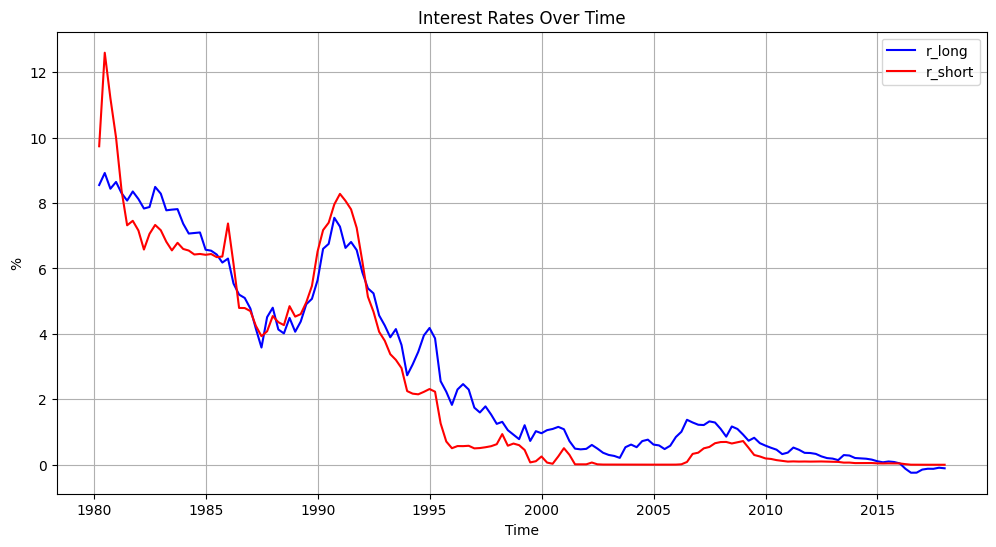

In [8]:
# Plotting the interest rates
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['r_long'], color='blue', label='r_long')
plt.plot(df['time'], df['r_short'], color='red', label='r_short')
plt.xlabel('Time')
plt.ylabel('%')
plt.legend()
plt.title('Interest Rates Over Time')
plt.grid()
plt.show()

### 図15.3(b)

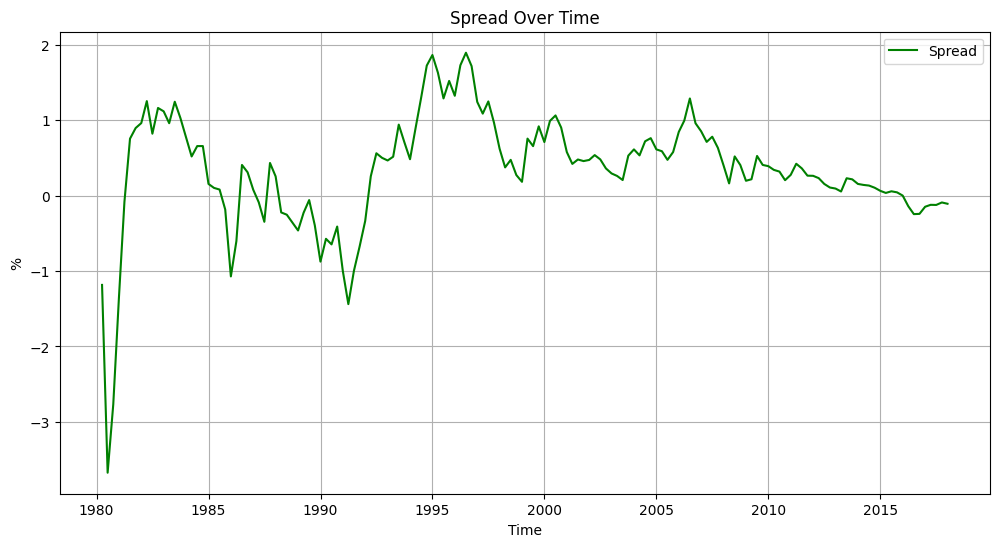

In [9]:
# Plotting the spread
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['spread'], color='green', label='Spread')
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Spread Over Time')
plt.legend()
plt.grid()
plt.show()

In [10]:
# Linear model for spread
model = sm.OLS(df['spread'], sm.add_constant(df['l.spread'])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 spread   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     493.4
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           2.77e-49
Time:                        14:20:42   Log-Likelihood:                -59.973
No. Observations:                 152   AIC:                             123.9
Df Residuals:                     150   BIC:                             130.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0518      0.032      1.619      0.1

## 16.2.4節

In [11]:
# Linear model for dspread
model = sm.OLS(df['dspread'], sm.add_constant(df['l.spread'])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                dspread   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     12.04
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           0.000681
Time:                        14:20:43   Log-Likelihood:                -59.973
No. Observations:                 152   AIC:                             123.9
Df Residuals:                     150   BIC:                             130.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0518      0.032      1.619      0.1

In [12]:
# ADF test for spread
adf_test_1 = adfuller(df['spread'], regression='c', autolag=None, maxlag=0)  # Drift
print('ADF Statistic (drift):', adf_test_1[0])
print('p-value (drift):', adf_test_1[1])

ADF Statistic (drift): -3.512620085235098
p-value (drift): 0.00766883751329386


In [70]:
spread = df['spread']

ValueError: Only gave one variable to VAR

In [77]:
# DF-GLS test for spread
adf_test_notrend = adfuller(df['spread'], regression='c', autolag=None, maxlag=10)  # No trend
print('ADF Statistic (no trend):', adf_test_notrend[0])
print('p-value (no trend):', adf_test_notrend[1])


ADF Statistic (no trend): -2.4939183740044686
p-value (no trend): 0.11696107109121878


In [78]:
adf_test_withtrend = adfuller(df['spread'], regression='ct', autolag=None, maxlag=10)  # With trend
print('ADF Statistic (with trend):', adf_test_withtrend[0])
print('p-value (with trend):', adf_test_withtrend[1])

ADF Statistic (with trend): -2.49220399030734
p-value (with trend): 0.33187091824911674


## 練習問題

短期金利と長期金利にはトレンドがあるので，ケース3を考える．

DF-GLS検定は以下となる．

In [81]:
# DF-GLS for r_long and r_short
adf_test_r_long = adfuller(df['r_long'], regression='ct', maxlag=10)  # With trend
print('ADF Statistic for r_long:', adf_test_r_long[0])
print('p-value for r_long:', adf_test_r_long[1])

ADF Statistic for r_long: -2.143318050467947
p-value for r_long: 0.5217704191506263


In [82]:
adf_test_r_short = adfuller(df['r_short'], regression='ct', maxlag=10)  # With trend
print('ADF Statistic for r_short:', adf_test_r_short[0])
print('p-value for r_short:', adf_test_r_short[1])

ADF Statistic for r_short: -2.5159575614683223
p-value for r_short: 0.3200305567707269


In [102]:
from statsmodels.tsa.stattools import adfuller

def dfgls(y, maxlag=None, regression="c", autolag="AIC"):
    return adfuller(y, maxlag=maxlag, regression=regression, autolag=autolag, store=True)

# 使用例
result = dfgls(df['r_short'], maxlag=10, regression="c", autolag="AIC")
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.303251407291756
p-value: 0.17092147225611576
